# Fieldkit basics

## Preliminaries

The first step when using fieldkit is to update your PYTHONPATH so that python can find the fieldkit module:

    $ export PYTHONPATH=<path>/fieldkit/

Once you have set your path correctly, you can import fieldkit:

In [1]:
import fieldkit as fk
import numpy as np

## Creating and manipulating yiour first field

To get started we will create a **field** object. Here we will create a 2d field consisting of 5x5 grid points and a square cell 10 units per side:

In [2]:
field = fk.Field(npw=(5,5),h=10.0*np.eye(2))

A **field** object is really nothing more than a container that stores (1) the a value of the field at each grid point and (2) the cartesian coordinates of each of those grid points.

The value of the field at each grid point can be accessed via `field.data`

In [3]:
field.data

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Clearly, the values of the field default to zero. 

The cartesian coordinates of each grid point are accessed via `field.coords`. Note that `field.coords` stores both the x and y coordinates of each grid point

In [4]:
field.coords[:,:,0] # x-coord of each grid point

array([[0., 0., 0., 0., 0.],
       [2., 2., 2., 2., 2.],
       [4., 4., 4., 4., 4.],
       [6., 6., 6., 6., 6.],
       [8., 8., 8., 8., 8.]])

In [5]:
field.coords[:,:,1] # y-coord of each grid point

array([[0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.]])

Clearly, this field is not terribly interesting. Lets manually set some elements of the field

In [6]:
field.data[:,2] = 1 # set all x-values for middle y-element to 1
field.data[2,:] = 2 # set all y-values for middle x-element to 2
field.data[4,0] = 3 # set final x-element and 1st y-element to 3
field.data 

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [2., 2., 2., 2., 2.],
       [0., 0., 1., 0., 0.],
       [3., 0., 1., 0., 0.]])

We can now plot this field

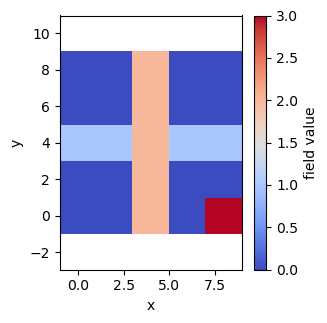

In [7]:
fk.plot(field, dpi=100)


> **A brief aside**: The careful reader will notice that the plot is slightly different from output obtained by printing `field.data`:
>
>>    1. The row of "2"s is horizontal in `field.data` but vertical in the plot
>>    2. The column of "1"s is vertical in `field.data` but horizontal in the plot
>>    3. The single value of "3" is in the bottom left of `field.data` but in the bottom right of the plot.
>
> This is due to the fact that field.data is stored in *row major* (or C-ordering) so that the y-values vary across the *rows* (horizontal) of the output of `field.data`. Also, the origin in the printed output of `field.data` is in the top left, while in the plot it is in the bottom right. 
>
> Understanding this isn't terribly important, but its good to keep in mind if you're wondering why the output of `field.data` and the plot don't seem to match up at first glance.


If we deform the cell tensor (h), the fields deform accordingly

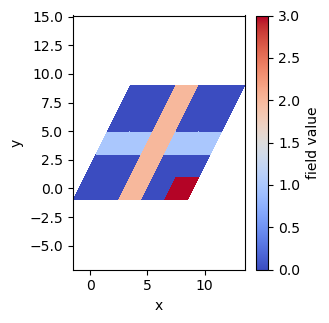

In [8]:
h = np.array([[10,5],[0,10]]) # cell is no longer square
field.set_h(h)
fk.plot(field,dpi=100)

## Common field initializations

Manually setting the values of `field.data` is tedious and **fieldkit** comes with a number of utility functions for adjusting the values of fields. A common one is the `add_gaussian` function. 

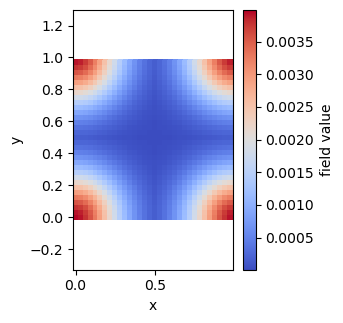

In [9]:
field = fk.Field(npw=(32,32)) # create a new field
fk.add_gaussian(field,center=(0,0), sigma=0.2) 
fk.plot(field,dpi=100)

As before, we can now deform the cell to generate a field configuration that might be resemble the hexagonally-packed cylinder phase formed in block copolymers.

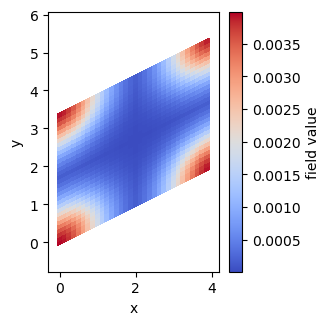

In [10]:
L = 4 # box length
theta = 60 * np.pi / 180 # 60 degree angle
h = np.array([[L,0],[L*np.cos(theta),L*np.sin(theta)]]) # cell tensor
field.set_h(h)
fk.plot(field, dpi=100)

In the next tutorial, you'll learn how to read/write field files tha can be used in OpenFTS.